In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Automobile_insurance_fraud.csv')
dataset.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
dataset.sample(3)

months_as_customer  age  policy_number policy_bind_date policy_state  \
680                 222   38         698470       17-06-2008           IN   
642                 143   32         111874       05-07-2000           IL   
210                  63   24         427484       08-01-1994           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
680    100/300               2000                1157.97               0   
642   500/1000               1000                1464.42               0   
210    250/500               2000                1620.89               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
680       433853  ...                     YES              60480         6720   
642       468986  ...                      NO              62260         5660   
210       469621  ...                      NO               6120         1020   

    property_claim vehicle_claim  auto_make  auto_model auto_year  \
680           6720         47040     Accura          TL      2001   
642           5660         50940       Saab         92x      1995   
210           1020          4080     Toyota     Corolla      2015   

    fraud_reported _c39  
680              N  NaN  
642              N  NaN  
210              N  NaN  

[3 rows x 40 columns]

In [4]:
dataset.shape

(1000, 40)

In [5]:
dataset.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
dataset.info

<bound method DataFrame.info of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_a

In [7]:
# Exploring my Trget variable

dataset.fraud_reported.unique()

array(['Y', 'N'], dtype=object)

In [8]:
dataset.fraud_reported.value_counts

<bound method IndexOpsMixin.value_counts of 0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object>

In [9]:
dataset.drop('_c39', axis=1, inplace=True)

In [10]:
for i in dataset:
    print('No of unique values for {} is : {}'. format(i, str(dataset[i].nunique())))

No of unique values for months_as_customer is : 391
No of unique values for age is : 46
No of unique values for policy_number is : 1000
No of unique values for policy_bind_date is : 951
No of unique values for policy_state is : 3
No of unique values for policy_csl is : 3
No of unique values for policy_deductable is : 3
No of unique values for policy_annual_premium is : 991
No of unique values for umbrella_limit is : 11
No of unique values for insured_zip is : 995
No of unique values for insured_sex is : 2
No of unique values for insured_education_level is : 7
No of unique values for insured_occupation is : 14
No of unique values for insured_hobbies is : 20
No of unique values for insured_relationship is : 6
No of unique values for capital-gains is : 338
No of unique values for capital-loss is : 354
No of unique values for incident_date is : 60
No of unique values for incident_type is : 4
No of unique values for collision_type is : 4
No of unique values for incident_severity is : 4
No o

In [11]:
# Highest uniuq values means high cardinality
# To tackle this high cardinality we can simply drop the columns as it is not adding any  values to our dataset 
# dropping the columns based on above results

In [12]:
dataset.drop(['incident_location', 'policy_number', 'policy_bind_date',
          'auto_model', 'insured_occupation', 'incident_date'], axis=1, inplace=True)

dataset.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level  ... bodily_injuries witnesses  \
0                      MD  ...               1         2   
1                      MD  ...               0         0   
2                     PhD  ...               2         3   
3                     PhD  ...               1         2   
4               Associate  ...               0         1   

   police_report_available  total_claim_amount injury_claim property_claim  \
0                      YES               71610         6510          13020   
1                        ?                5070          780            780   
2                       NO               34650         7700           3850   
3                       NO               63400         6340           6340   
4                       NO                6500         1300            650   

  vehicle_claim  auto_make auto_year fraud_reported  
0         52080       Saab      2004              Y  
1          3510   Mercedes      2007              Y  
2         23100      Dodge      2007              N  
3         50720  Chevrolet      2014              Y  
4          4550     Accura      2009              N  

[5 rows x 33 columns]

In [13]:
# lETS CHECK NULL VALUES IF ANY


dataset.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

In [14]:
# As we can see there are no null values in any other column except _c39 . and _c39 column has null values in all clolumns we will simply drop it. 

In [15]:
dataset.head(3)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   

  insured_education_level  ... bodily_injuries witnesses  \
0                      MD  ...               1         2   
1                      MD  ...               0         0   
2                     PhD  ...               2         3   

   police_report_available  total_claim_amount injury_claim property_claim  \
0                      YES               71610         6510          13020   
1                        ?                5070          780            780   
2                       NO               34650         7700           3850   

  vehicle_claim auto_make auto_year fraud_reported  
0         52080      Saab      2004              Y  
1          3510  Mercedes      2007              Y  
2         23100     Dodge      2007              N  

[3 rows x 33 columns]

<AxesSubplot:>

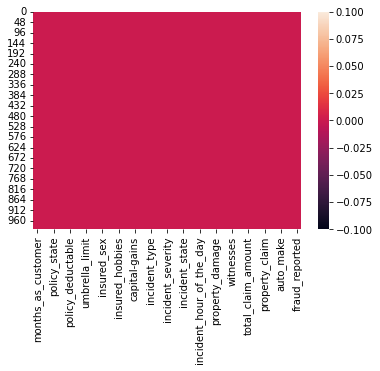

In [16]:
sns.heatmap(dataset.isnull())

In [17]:
# Lets check if we have duplicates

dataset.drop_duplicates()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                  1406.91               0       466132        MALE   
1                  1197.22         5000000       468176        MALE   
2                  1413.14         5000000       430632      FEMALE   
3                  1415.74         6000000       608117      FEMALE   
4                  1583.91         6000000       610706        MALE   
..                     ...             ...          ...         ...   
995                1310.80               0       431289      FEMALE   
996                1436.79               0       608177      FEMALE   
997                1383.49         3000000       442797      FEMALE   
998                1356.92         5000000       441714        MALE   
999                 766.19               0       612260      FEMALE   

    insured_education_level  ... bodily_injuries witnesses  \
0                        MD  ...               1         2   
1                        MD  ...               0         0   
2                       PhD  ...               2         3   
3                       PhD  ...               1         2   
4                 Associate  ...               0         1   
..                      ...  ...             ...       ...   
995                 Masters  ...               0         1   
996                     PhD  ...               2         3   
997                 Masters  ...               2         3   
998               Associate  ...               0         1   
999               Associate  ...               0         3   

     police_report_available  total_claim_amount injury_claim property_claim  \
0                        YES               71610         6510          13020   
1                          ?                5070          780            780   
2                         NO               34650         7700           3850   
3                         NO               63400         6340           6340   
4                         NO                6500         1300            650   
..                       ...                 ...          ...            ...   
995                        ?               87200        17440           8720   
996                        ?              108480        18080          18080   
997                      YES               67500         7500           7500   
998                      YES               46980         5220           5220   
999                        ?                5060          460            920   

    vehicle_claim   auto_make auto_year fraud_reported  
0           52080        Saab      2004              Y  
1            3510    Mercedes      2007              Y  
2           23100       Dodge      2007              N  
3           50720   Chevrolet      2014              Y  
4            4550      Accura      2009              N  
..            ...         ...       ...            ...  
995         61040       Honda      2006              N  
996         72320  Volkswagen      2015              N  
997         52500      Suburu   

# Data Analysis/Visualization

In [18]:
dataset.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [19]:
# lets seperate the Categorical and Numerical features for etter understnading

In [20]:
categorical_features=[column_name for column_name in dataset.columns if dataset[column_name].dtype =='object']
dataset[categorical_features].isnull().sum()

policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type             0
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage            0
police_report_available    0
auto_make                  0
fraud_reported             0
dtype: int64

In [21]:
# Numerical feature


numerical_features=[column_name for column_name in dataset.columns if dataset[column_name].dtype !='object']
dataset[numerical_features].isnull().sum()

months_as_customer             0
age                            0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_year                      0
dtype: int64

In [22]:
# Target variable is 'fraud_reported'

dataset['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

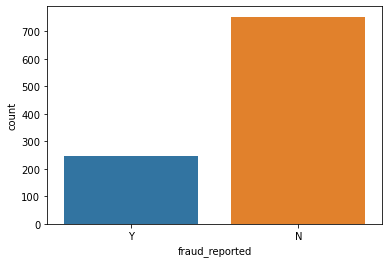

In [23]:
sns.countplot(x='fraud_reported', data=dataset)

months_as_customer                AxesSubplot(0.125,0.851183;0.032563x0.0288168)
age                            AxesSubplot(0.164076,0.851183;0.032563x0.0288168)
policy_deductable              AxesSubplot(0.203151,0.851183;0.032563x0.0288168)
policy_annual_premium          AxesSubplot(0.242227,0.851183;0.032563x0.0288168)
umbrella_limit                 AxesSubplot(0.281303,0.851183;0.032563x0.0288168)
insured_zip                    AxesSubplot(0.320378,0.851183;0.032563x0.0288168)
capital-gains                  AxesSubplot(0.359454,0.851183;0.032563x0.0288168)
capital-loss                   AxesSubplot(0.398529,0.851183;0.032563x0.0288168)
incident_hour_of_the_day       AxesSubplot(0.437605,0.851183;0.032563x0.0288168)
number_of_vehicles_involved    AxesSubplot(0.476681,0.851183;0.032563x0.0288168)
bodily_injuries                AxesSubplot(0.515756,0.851183;0.032563x0.0288168)
witnesses                      AxesSubplot(0.554832,0.851183;0.032563x0.0288168)
total_claim_amount          

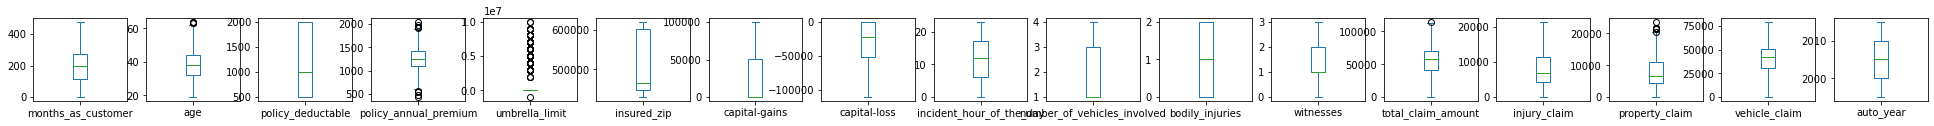

In [24]:
dataset.plot(kind='box', subplots=True, layout=(22,20), figsize=(40,40))

In [25]:
# we can see that thereare some outliers are present and we will handle them accordingly

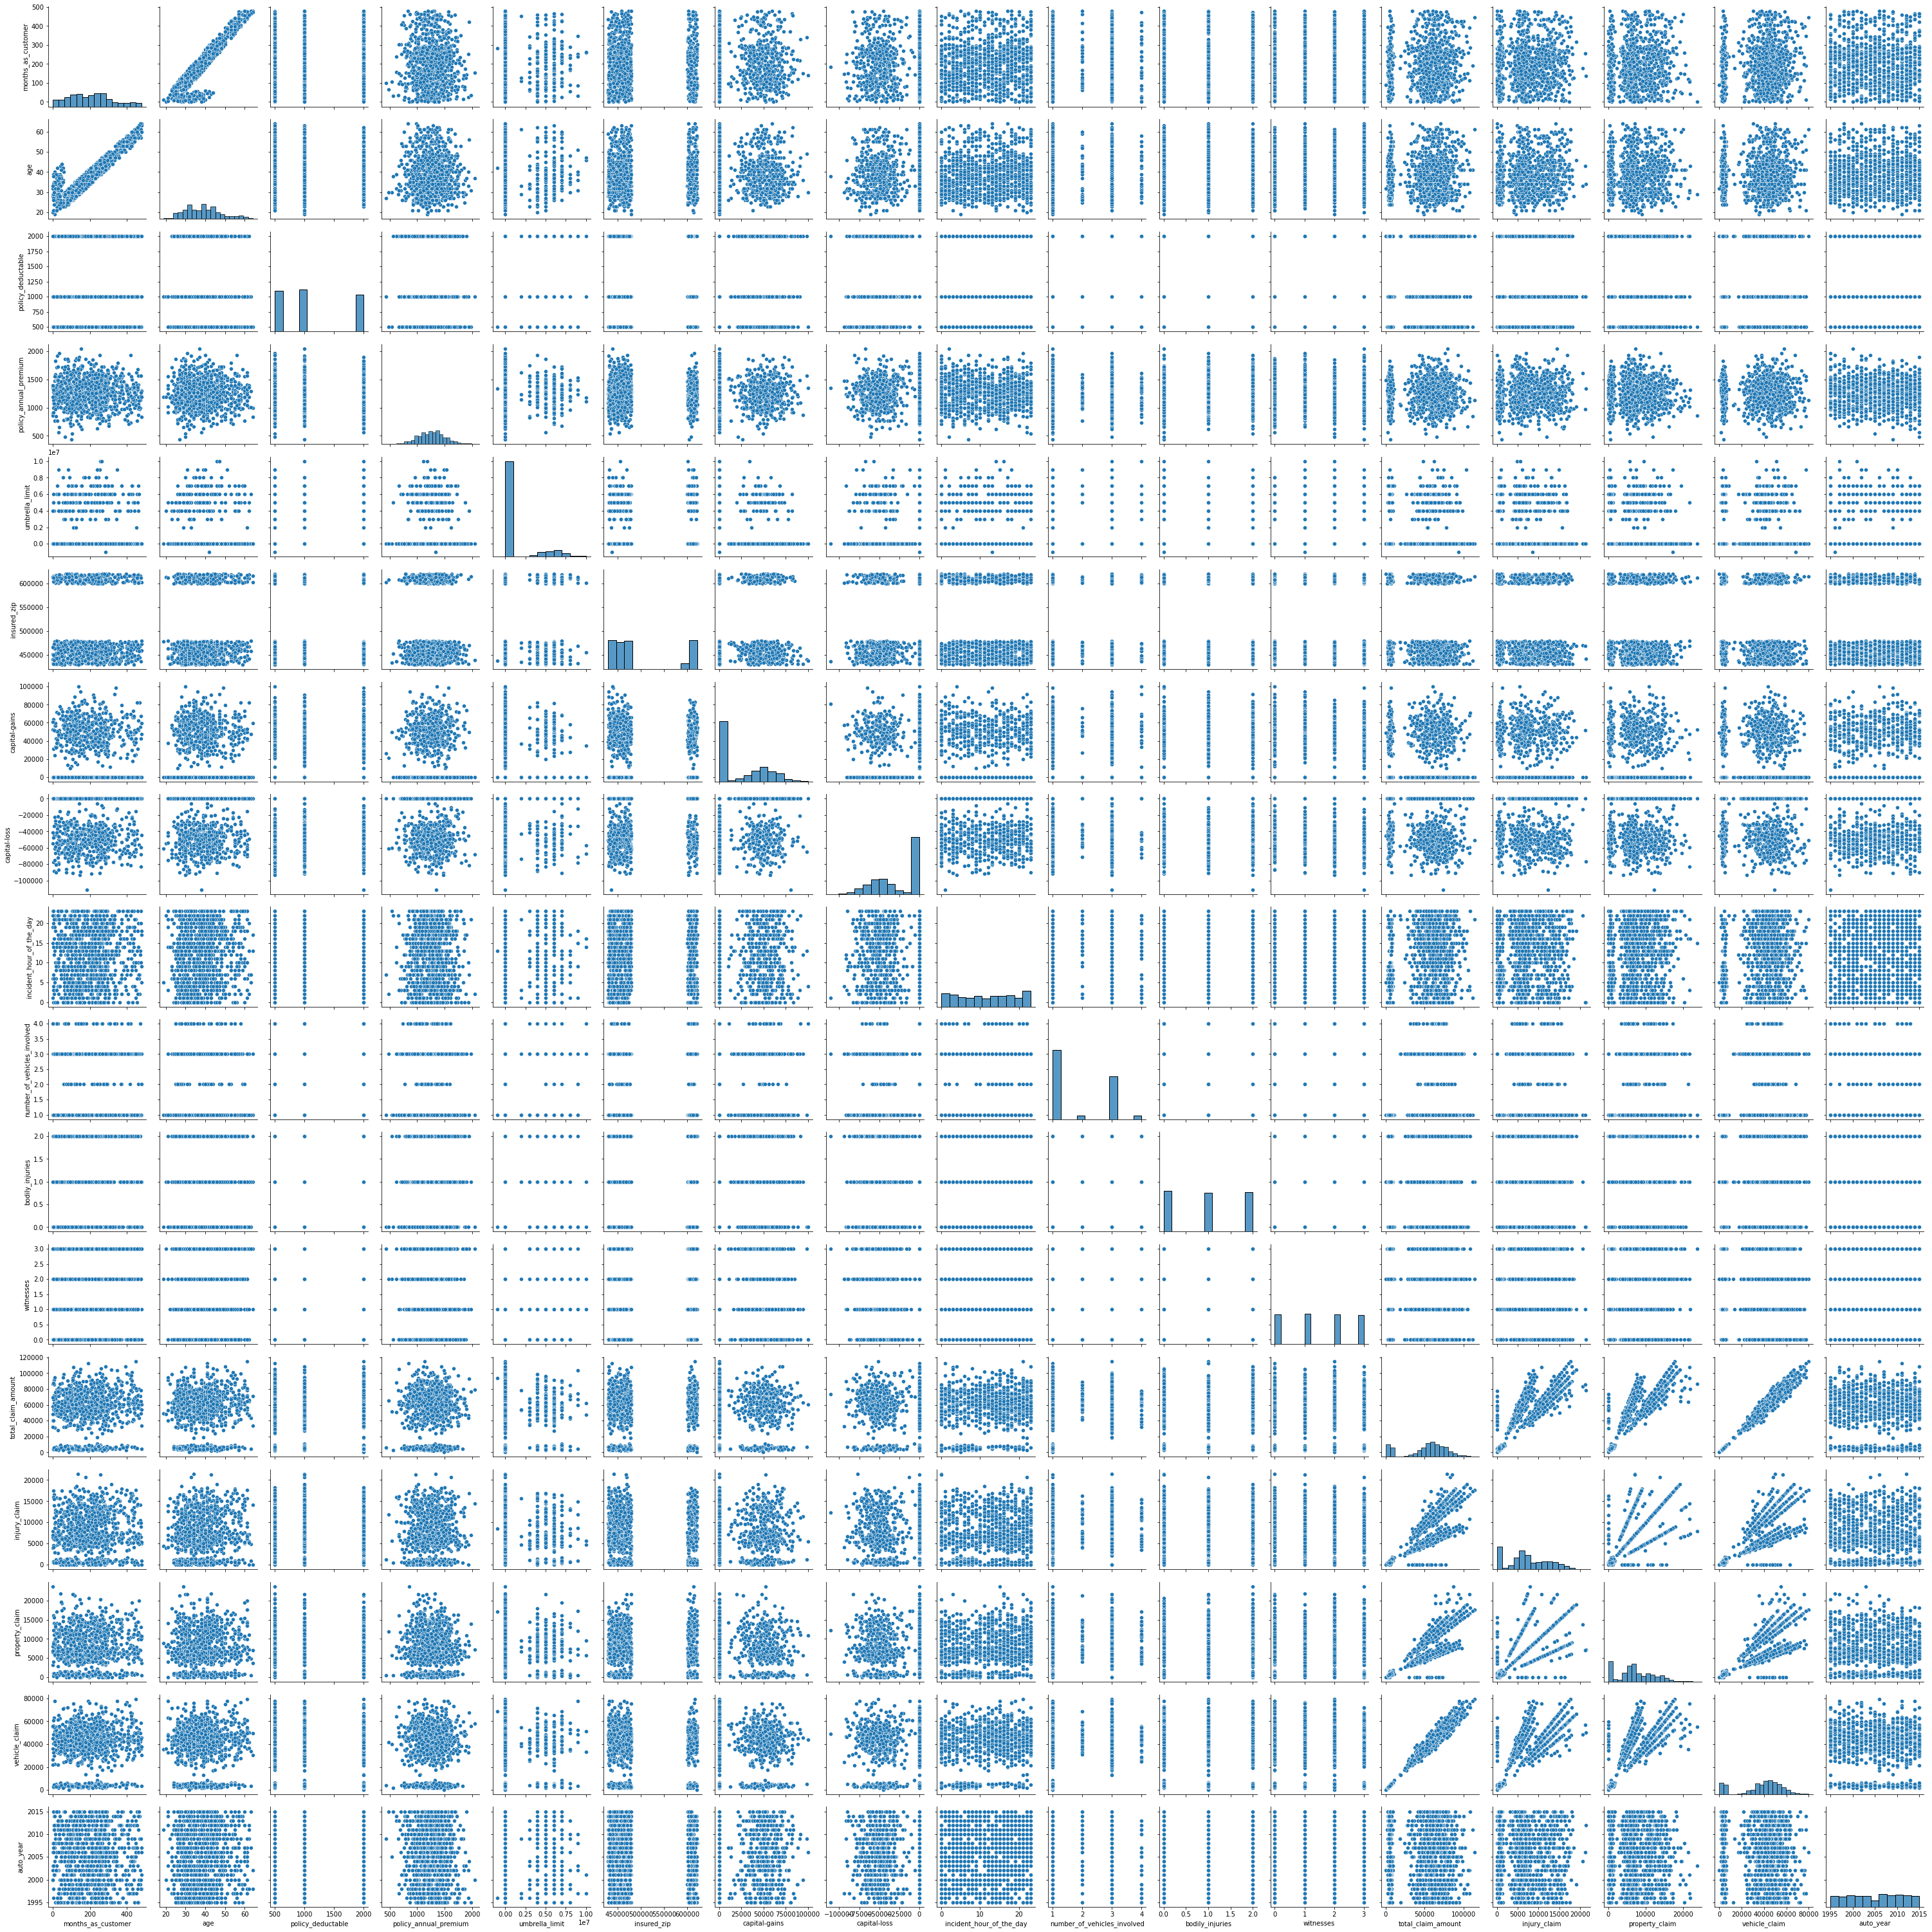

In [26]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

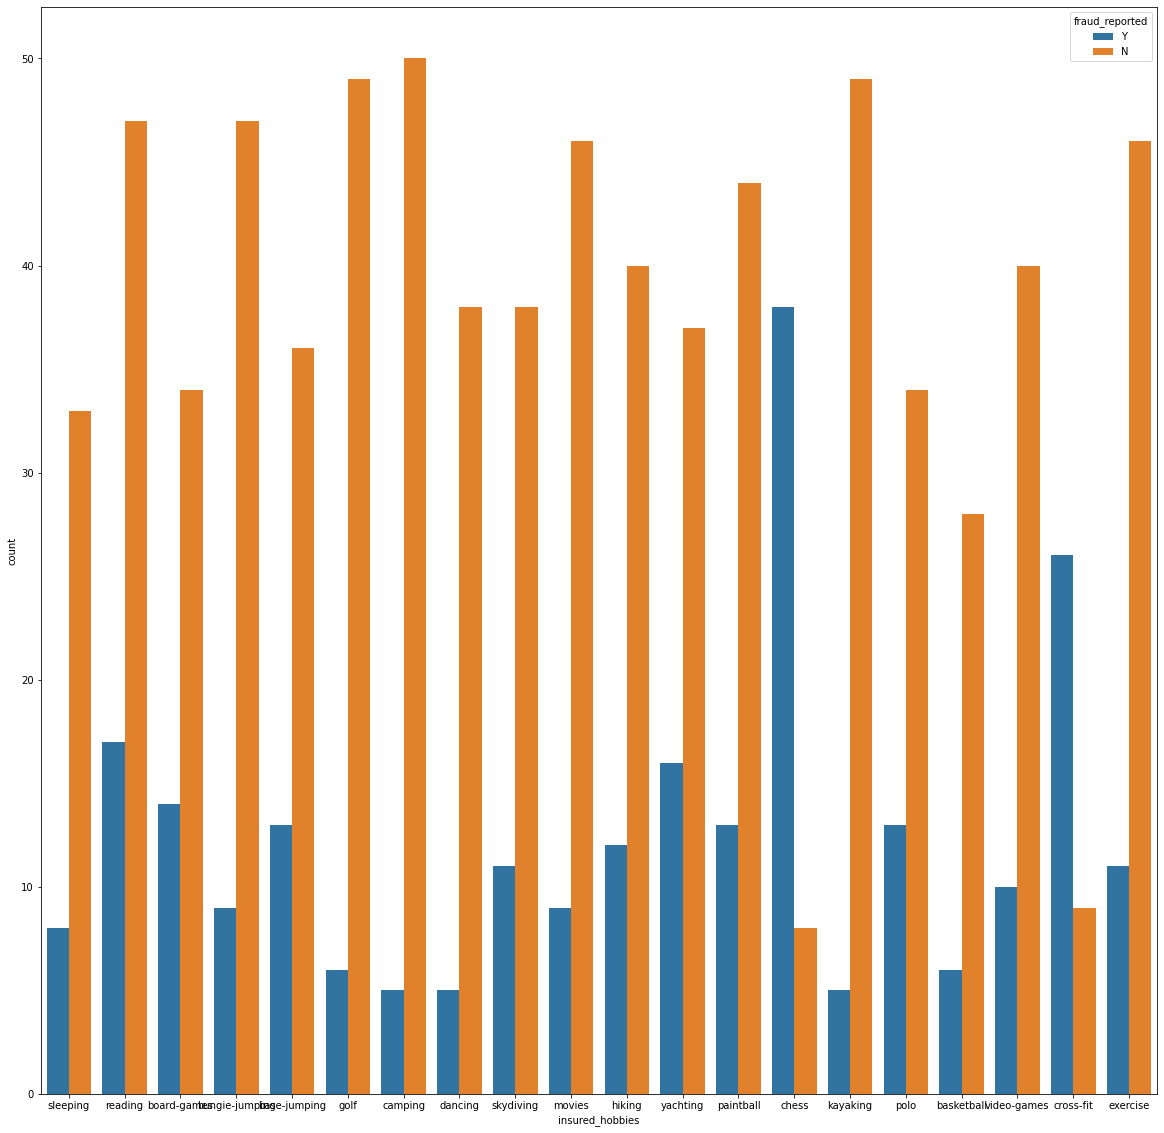

In [27]:
# Lets check the relation between 

f, ax =plt.subplots(figsize=(20,20))
sns.countplot(x='insured_hobbies', hue='fraud_reported', data=dataset)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

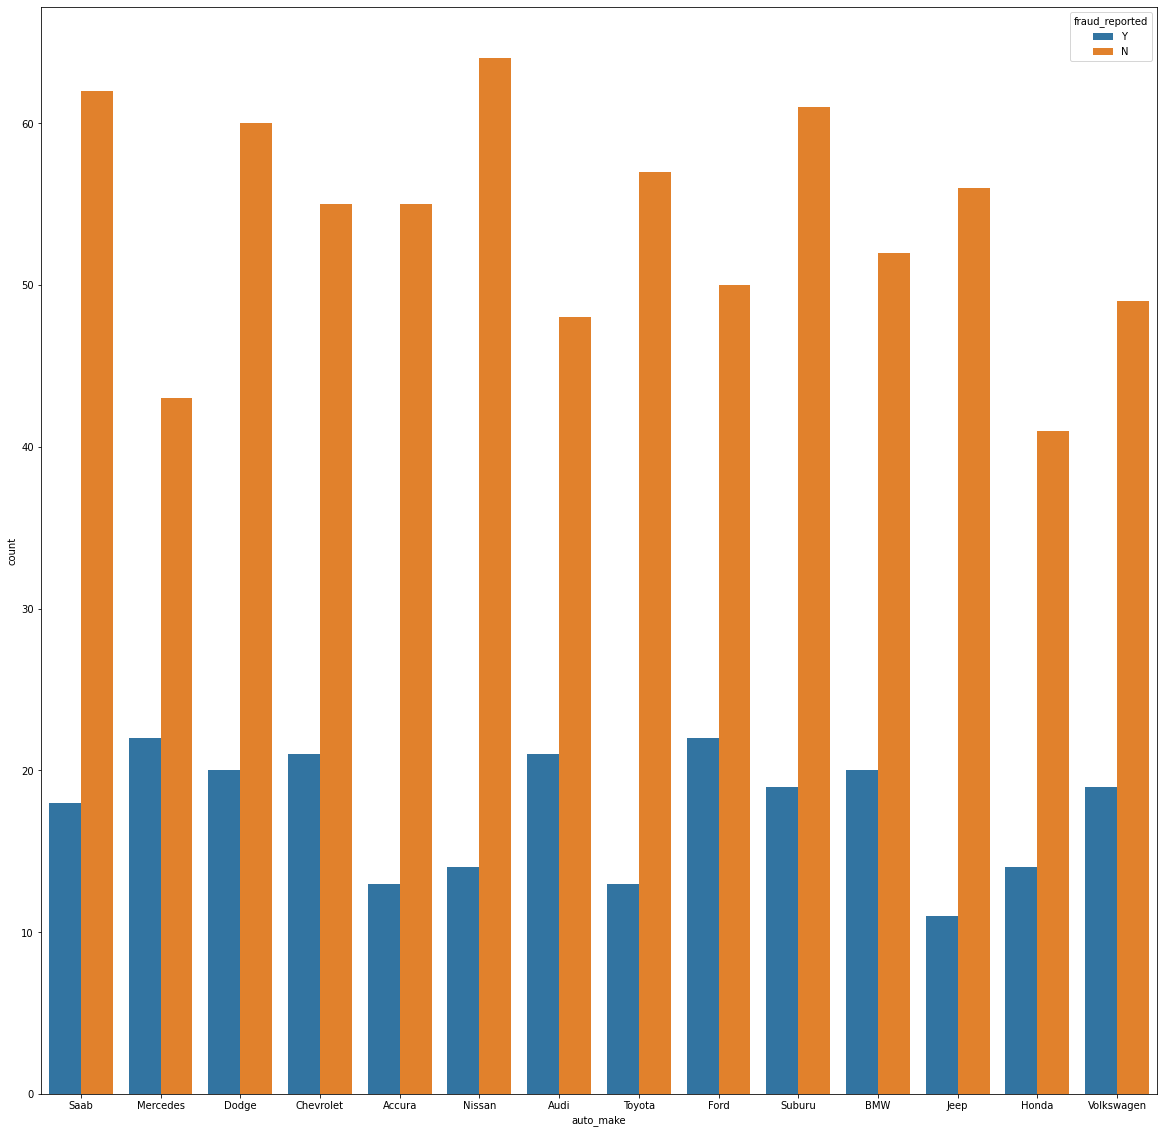

In [28]:
f, ax =plt.subplots(figsize=(20,20))
sns.countplot(x='auto_make', hue='fraud_reported', data=dataset)

<AxesSubplot:xlabel='injury_claim', ylabel='count'>

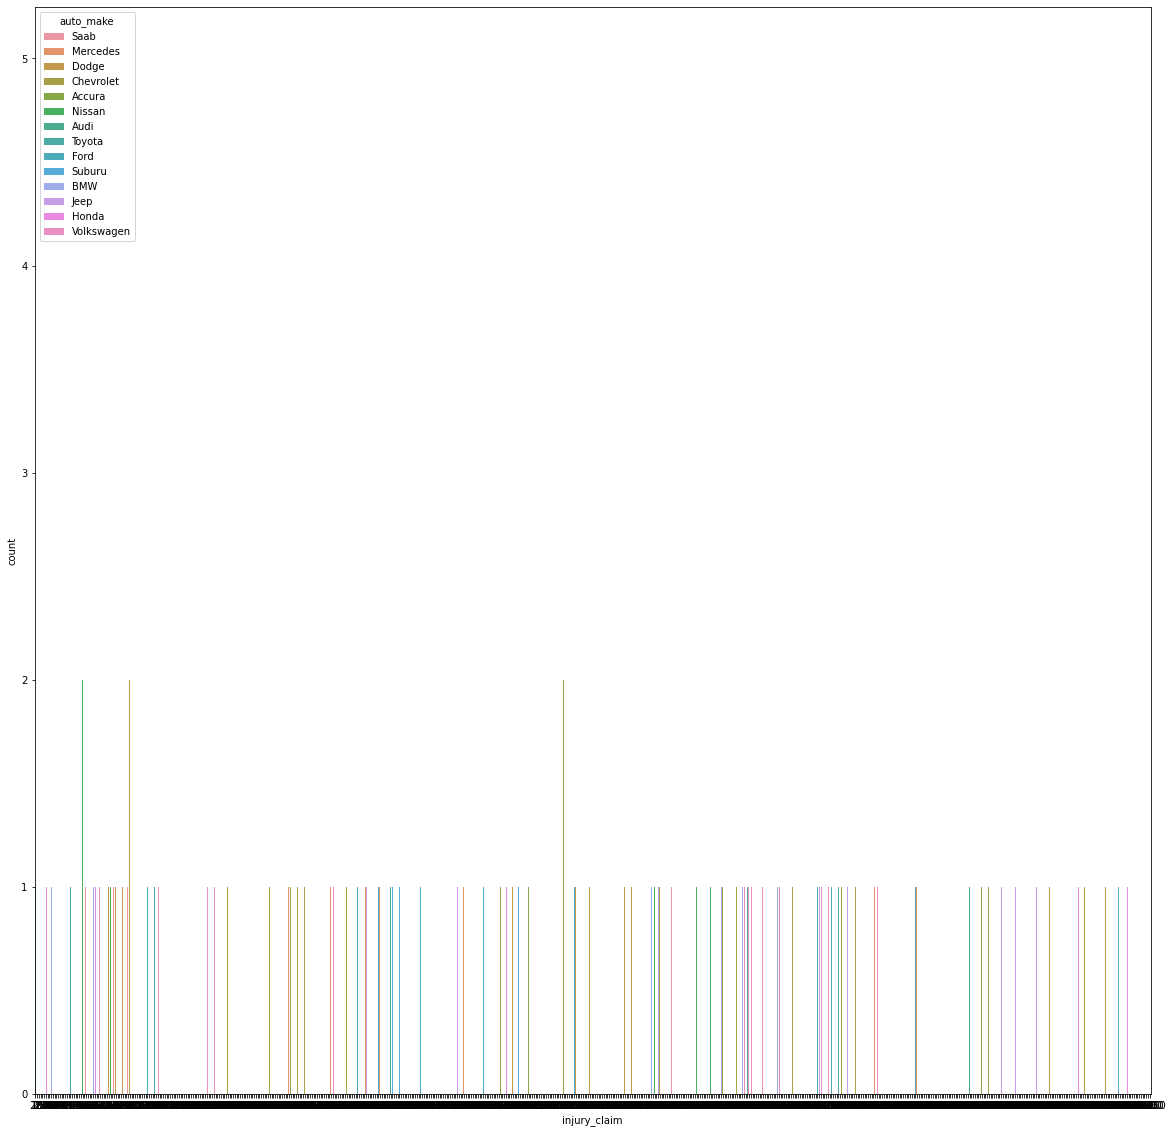

In [31]:
f, ax =plt.subplots(figsize=(20,20))
sns.countplot(x='injury_claim', hue='auto_make', data=dataset)

In [33]:
dataset.head(3)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   

  insured_education_level  ... bodily_injuries witnesses  \
0                      MD  ...               1         2   
1                      MD  ...               0         0   
2                     PhD  ...               2         3   

   police_report_available  total_claim_amount injury_claim property_claim  \
0                      YES               71610         6510          13020   
1                        ?                5070          780            780   
2                       NO               34650         7700           3850   

  vehicle_claim auto_make auto_year fraud_reported  
0         52080      Saab      2004              Y  
1          3510  Mercedes      2007              Y  
2         23100     Dodge      2007              N  

[3 rows x 33 columns]

In [35]:
# To view all the columns in juputer notebook

pd.set_option('display.max_columns', None)
dataset.head(5)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level insured_hobbies insured_relationship  capital-gains  \
0                      MD        sleeping              husband          53300   
1                      MD         reading       other-relative              0   
2                     PhD     board-games            own-child          35100   
3                     PhD     board-games            unmarried          48900   
4               Associate     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft                ?      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_year  \
0          6510           13020          52080       Saab       2004   
1           780             780           3510   Mercedes       2007   
2          7700            3850          23100      Dodge       2007   
3          6340            6340          50720  Chevrolet       2014   
4          1300             650           4550     Accura       2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N

# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

In [68]:
dataset[['policy_csl','policy_state', 'insured_sex', 'insured_education_level', 'insured_hobbies', 'insured_relationship',
        'incident_type', 'collision_type', 'incident_severity','authorities_contacted', 'incident_state', 'incident_city',
        'property_damage', 'police_report_available', 'auto_make', 'fraud_reported']] = dataset[['policy_csl','policy_state', 'insured_sex', 'insured_education_level', 'insured_hobbies', 'insured_relationship',
        'incident_type', 'collision_type', 'incident_severity','authorities_contacted', 'incident_state', 'incident_city',
        'property_damage', 'police_report_available', 'auto_make', 'fraud_reported']].apply(LabelEncoder().fit_transform)

print(dataset)

     months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0  

In [40]:
dataset.head()

months_as_customer  age  policy_state policy_csl  policy_deductable  \
0                 328   48             2    250/500               1000   
1                 228   42             1    250/500               2000   
2                 134   29             2    100/300               2000   
3                 256   41             0    250/500               2000   
4                 228   44             0   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   
2                1413.14         5000000       430632            0   
3                1415.74         6000000       608117            0   
4                1583.91         6000000       610706            1   

   insured_education_level  insured_hobbies  insured_relationship  \
0                        4               17                     0   
1                        4               15                     2   
2                        6                2                     3   
3                        6                2                     4   
4                        0                2                     4   

   capital-gains  capital-loss  incident_type  collision_type  \
0          53300             0              2               3   
1              0             0              3               0   
2          35100             0              0               2   
3          48900        -62400              2               1   
4          66000        -46000              3               0   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   
2                  1                      4               1              1   
3                  0                      4               2              0   
4                  1                      2               1              0   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                         5                            1                2   
1                         8                            1                0   
2                         7                            3                1   
3                         5                            1                0   
4                        20                            1                1   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                1          2                        2               71610   
1                0          0                        0                5070   
2                2          3                        1               34650   
3                1          2                        1               63400   
4                0          1                        1                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_year  \
0          6510           13020          52080         10       2004   
1           780             780           3510          8       2007   
2          7700            3850          23100          4       2007   
3          6340            6340          50720          3       2014   
4          1300             650           4550          0       2009   

   fraud_reported  
0               1  
1               1  
2               0  
3               1  
4               0

# Correlation

In [41]:
dataset.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922098     -0.000328   
age                                    0.922098  1.000000     -0.014533   
policy_state                          -0.000328 -0.014533      1.000000   
policy_deductable                      0.026807  0.029188      0.010033   
policy_annual_premium                  0.005018  0.014404      0.012455   
umbrella_limit                         0.015498  0.018126     -0.029580   
insured_zip                            0.017895  0.025604      0.008777   
insured_sex                            0.060925  0.073337     -0.020481   
insured_education_level               -0.000833  0.000969     -0.034327   
insured_hobbies                       -0.093661 -0.081315     -0.038689   
insured_relationship                   0.069727  0.074832     -0.018506   
capital-gains                          0.006399 -0.007075      0.074551   
capital-loss                           0.020209  0.007368     -0.030338   
incident_type                         -0.017377 -0.025626      0.031848   
collision_type                        -0.017824 -0.018672      0.034739   
incident_severity                     -0.059581 -0.058439     -0.026377   
authorities_contacted                  0.010021  0.015417     -0.016777   
incident_state                         0.005369  0.005770      0.008723   
incident_city                         -0.000130 -0.002291     -0.002077   
incident_hour_of_the_day               0.070639  0.087161      0.029457   
number_of_vehicles_involved            0.014736  0.022102     -0.042263   
property_damage                        0.007040 -0.001486      0.008623   
bodily_injuries                       -0.010162 -0.015679      0.013384   
witnesses                              0.058383  0.052359      0.022960   
police_report_available                0.017647  0.014661      0.071950   
total_claim_amount                     0.062108  0.069863     -0.006002   
injury_claim                           0.065329  0.075522     -0.046290   
property_claim                         0.034940  0.060898      0.008406   
vehicle_claim                          0.061013  0.062588      0.001425   
auto_make                              0.047655  0.030410      0.017124   
auto_year                             -0.000292  0.001354      0.002114   
fraud_reported                         0.020544  0.012143      0.029432   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_state                          0.010033               0.012455   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
insured_sex                          -0.009733               0.038853   
insured_education_level               0.015217              -0.019715   
insured_hobbies                       0.004061              -0.018019   
insured_relationship                 -0.022945               0.001925   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_type                        -0.038411               0.053603   
collision_type                       -0.033182               0.036719   
incident_severity                    -0.015711              -0.011155   
authorities_contacted                -0.000760              -0.055191   
incident_state                        0.006517               0.046434   
incident_city                        -0.045117               0.048724   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_i

In [42]:
dataset.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
property_damage               -0.030497
police_report_available       -0.028159
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
months_as_customer             0.020544
insured_relationship           0.021043
policy_state                   0.029432
insured_sex                    0.030873
bodily_injuries                0.033877
witnesses                      0.049497
number_of_vehicles_involved    0.051839


<AxesSubplot:>

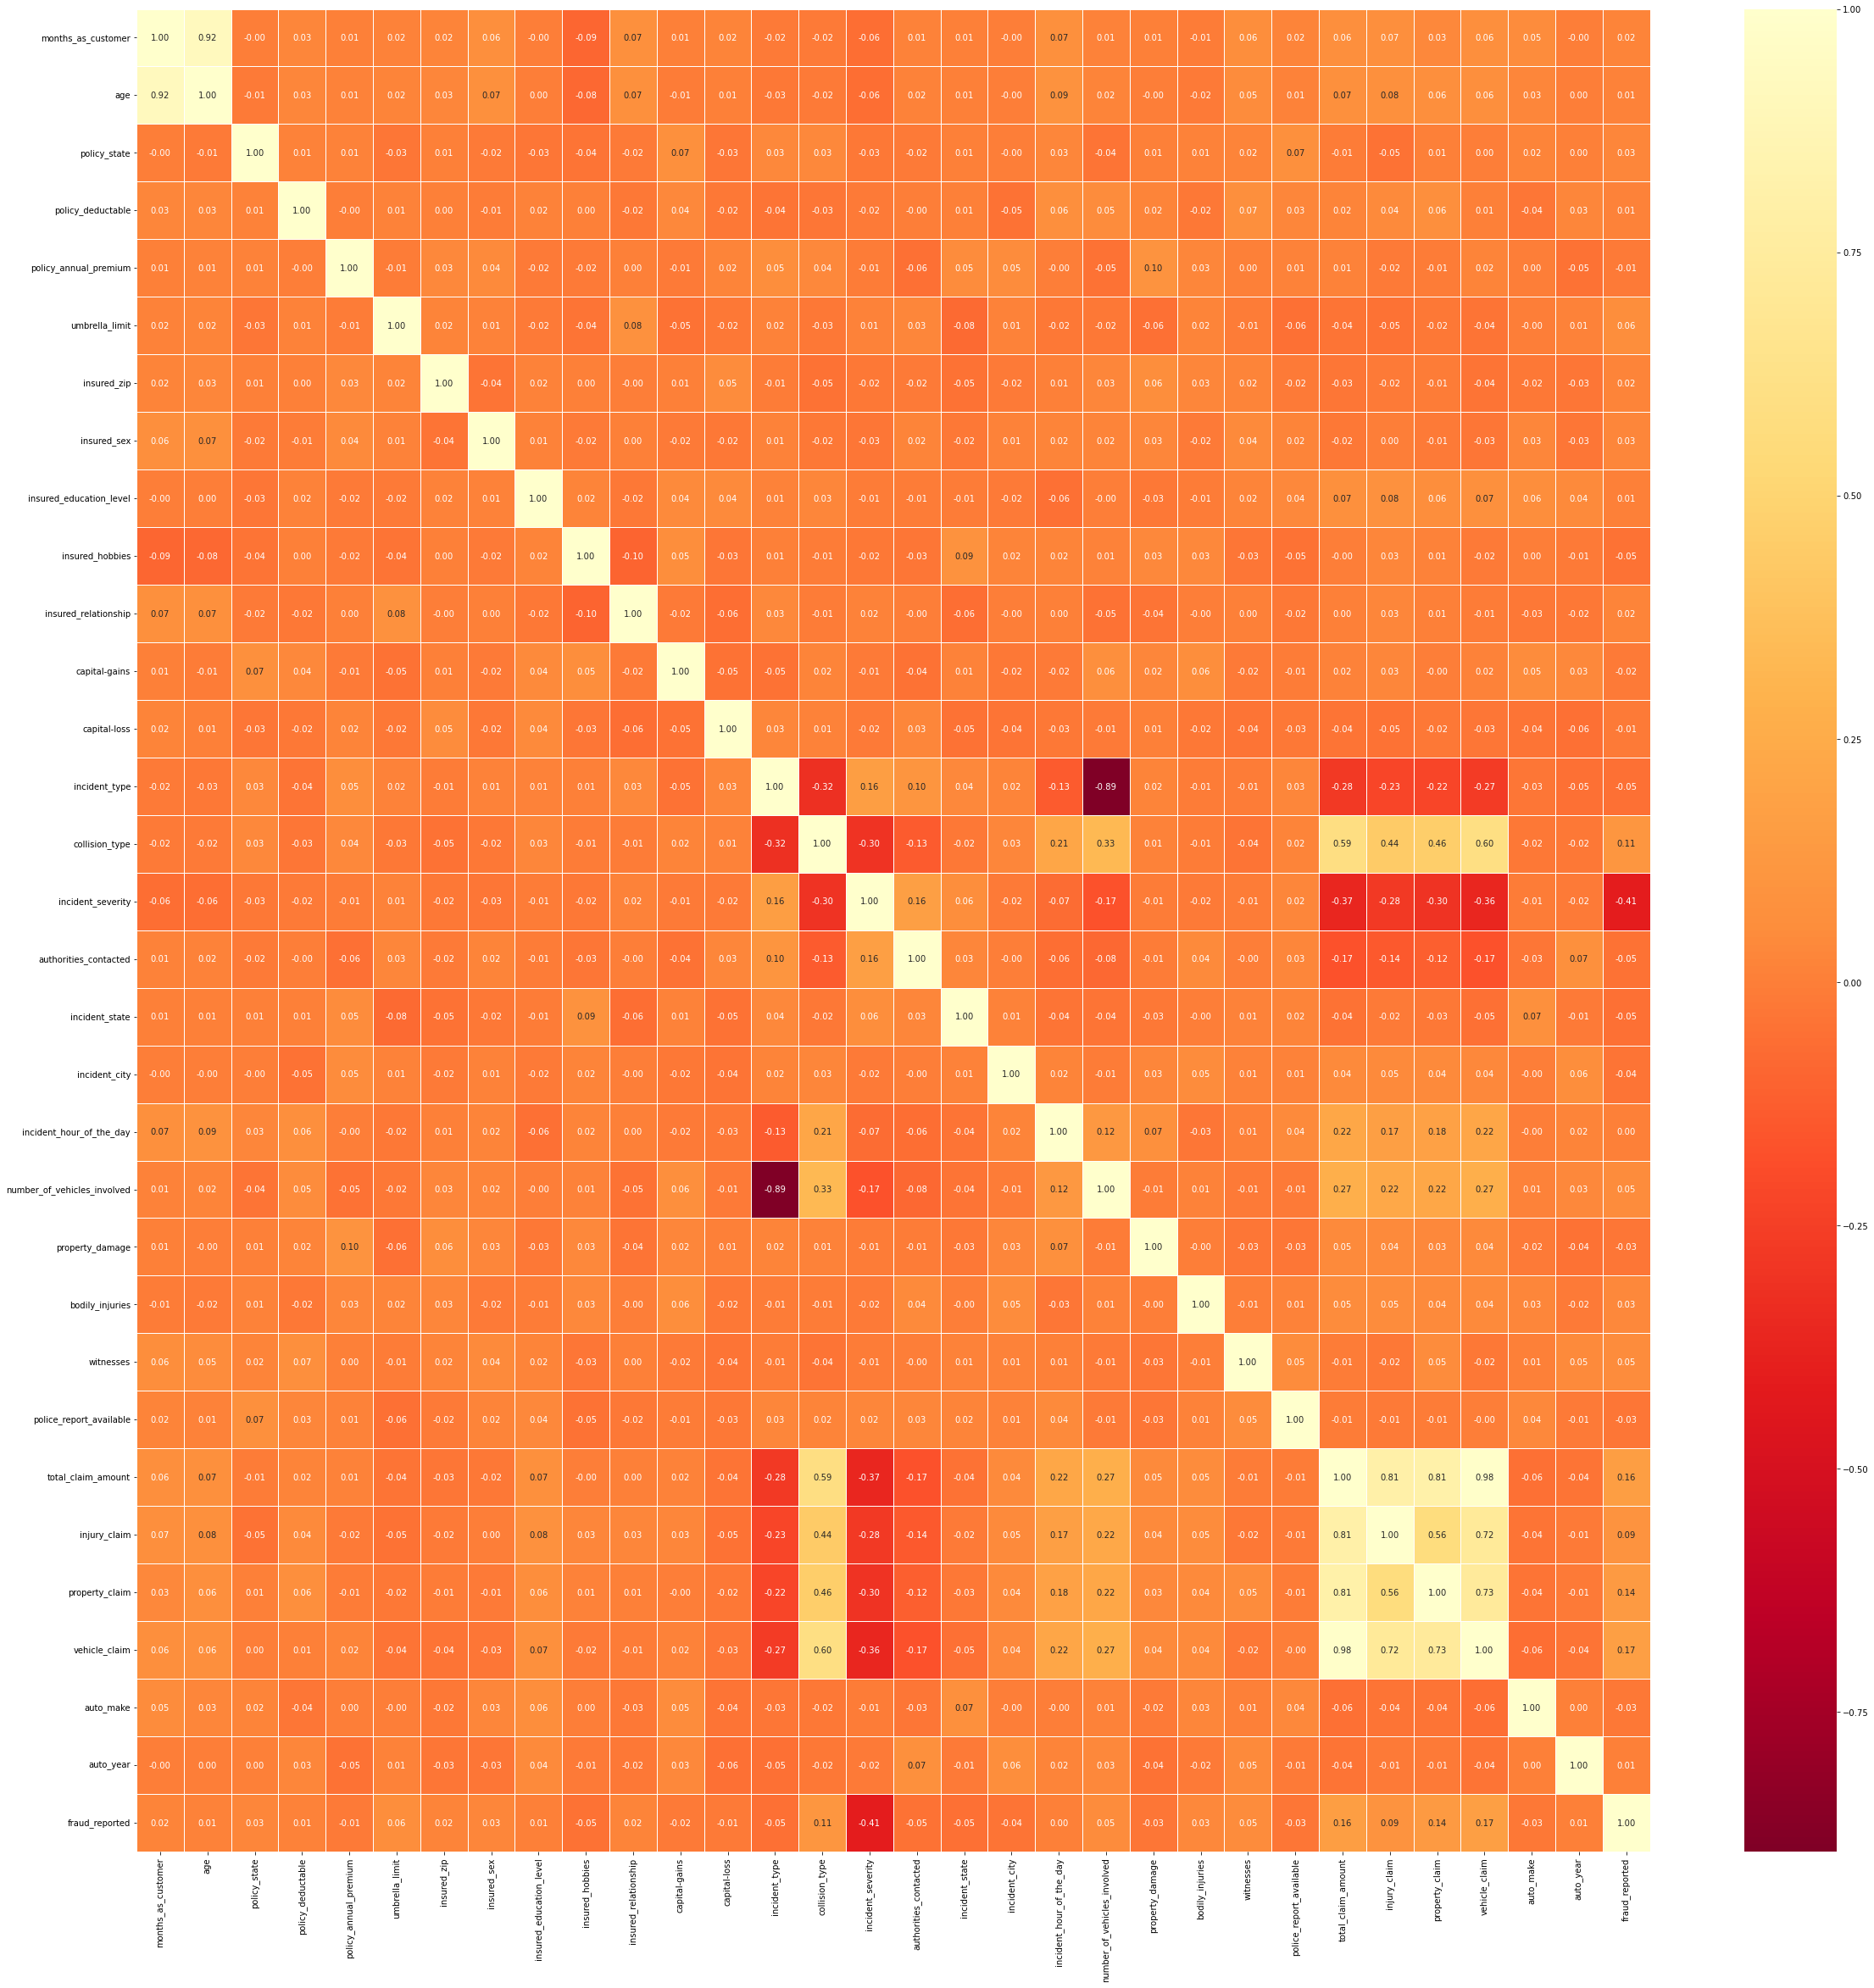

In [45]:
plt.figure(figsize=(40,40))
sns.heatmap(dataset.corr(),cmap= 'YlOrRd_r', linewidth=1.0, annot=True, fmt='.2f')

In [46]:
# Observation


In [47]:
# Summary statostics

In [48]:
dataset.describe()

months_as_customer          age  policy_state  policy_deductable  \
count         1000.000000  1000.000000    1000.00000        1000.000000   
mean           203.954000    38.948000       1.01400        1136.000000   
std            115.113174     9.140287       0.83096         611.864673   
min              0.000000    19.000000       0.00000         500.000000   
25%            115.750000    32.000000       0.00000         500.000000   
50%            199.500000    38.000000       1.00000        1000.000000   
75%            276.250000    44.000000       2.00000        2000.000000   
max            479.000000    64.000000       2.00000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  insured_sex  \
count            1000.000000    1.000000e+03    1000.000000  1000.000000   
mean             1256.406150    1.101000e+06  501214.488000     0.463000   
std               244.167395    2.297407e+06   71701.610941     0.498879   
min               433.330000   -1.000000e+06  430104.000000     0.000000   
25%              1089.607500    0.000000e+00  448404.500000     0.000000   
50%              1257.200000    0.000000e+00  466445.500000     0.000000   
75%              1415.695000    0.000000e+00  603251.000000     1.000000   
max              2047.590000    1.000000e+07  620962.000000     1.000000   

       insured_education_level  insured_hobbies  insured_relationship  \
count              1000.000000      1000.000000           1000.000000   
mean                  2.966000         9.731000              2.416000   
std                   1.948497         5.674049              1.681003   
min                   0.000000         0.000000              0.000000   
25%                   1.000000         5.000000              1.000000   
50%                   3.000000        10.000000              2.000000   
75%                   5.000000        15.000000              4.000000   
max                   6.000000        19.000000              5.000000   

       capital-gains   capital-loss  incident_type  collision_type  \
count    1000.000000    1000.000000    1000.000000     1000.000000   
mean    25126.100000  -26793.700000       1.172000        1.666000   
std     27872.187708   28104.096686       1.081474        1.063755   
min         0.000000 -111100.000000       0.000000        0.000000   
25%         0.000000  -51500.000000       0.000000        1.000000   
50%         0.000000  -23250.000000       1.000000        2.000000   
75%     51025.000000       0.000000       2.000000        3.000000   
max    100500.000000       0.000000       3.000000        3.000000   

       incident_severity  authorities_contacted  incident_state  \
count        1000.000000            1000.000000     1000.000000   
mean            1.184000               2.167000        3.242000   
std             0.939695               1.532142        2.155942   
min             0.000000               0.000000        0.000000   
25%             0.000000               1.000000        1.000000   
50%             1.000000               2.000000        4.000000   
75%             2.000000               4.000000        5.000000   
max             3.000000               4.000000        6.000000   

       incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean        2.966000                 11.644000                      1.83900   
std         2.044266                  6.951373                      1.01888   
min         0.000000                  0.000000                      1.00000   
25%         1.000000                  6.000000                      1.00000   
50%         3.000000                 12.000000                      1.00000   
75%         5.000000                 17.000000                      3.00000   
max         6.000000                 23.000000                      4.00000   

       property_damage  bodily_injuries  

In [49]:
dataset.describe()
round(dataset.describe()[1:].transpose(),2)

mean         std         min        25%  \
months_as_customer               203.95      115.11        0.00     115.75   
age                               38.95        9.14       19.00      32.00   
policy_state                       1.01        0.83        0.00       0.00   
policy_deductable               1136.00      611.86      500.00     500.00   
policy_annual_premium           1256.41      244.17      433.33    1089.61   
umbrella_limit               1101000.00  2297406.60 -1000000.00       0.00   
insured_zip                   501214.49    71701.61   430104.00  448404.50   
insured_sex                        0.46        0.50        0.00       0.00   
insured_education_level            2.97        1.95        0.00       1.00   
insured_hobbies                    9.73        5.67        0.00       5.00   
insured_relationship               2.42        1.68        0.00       1.00   
capital-gains                  25126.10    27872.19        0.00       0.00   
capital-loss                  -26793.70    28104.10  -111100.00  -51500.00   
incident_type                      1.17        1.08        0.00       0.00   
collision_type                     1.67        1.06        0.00       1.00   
incident_severity                  1.18        0.94        0.00       0.00   
authorities_contacted              2.17        1.53        0.00       1.00   
incident_state                     3.24        2.16        0.00       1.00   
incident_city                      2.97        2.04        0.00       1.00   
incident_hour_of_the_day          11.64        6.95        0.00       6.00   
number_of_vehicles_involved        1.84        1.02        1.00       1.00   
property_damage                    0.94        0.81        0.00       0.00   
bodily_injuries                    0.99        0.82        0.00       0.00   
witnesses                          1.49        1.11        0.00       1.00   
police_report_available            0.97        0.81        0.00       0.00   
total_claim_amount             52761.94    26401.53      100.00   41812.50   
injury_claim                    7433.42     4880.95        0.00    4295.00   
property_claim                  7399.57     4824.73        0.00    4445.00   
vehicle_claim                  37928.95    18886.25       70.00   30292.50   
auto_make                          6.55        4.03        0.00       3.00   
auto_year                       2005.10        6.02     1995.00    2000.00   
fraud_reported                     0.25        0.43        0.00       0.00   

                                  50%        75%          max  
months_as_customer              199.5     276.25       479.00  
age                              38.0      44.00        64.00  
policy_state                      1.0       2.00         2.00  
policy_deductable              1000.0    2000.00      2000.00  
policy_annual_premium          1257.2    1415.70      2047.59  
umbrella_limit                    0.0       0.00  10000000.00  
insured_zip                  466445.5  603251.00    620962.00  
insured_sex                       0.0       1.00         1.00  
insured_education_level           3.0       5.00         6.00  
insured_hobbies                  10.0      15.00        19.00  
insured_relationship              2.0       4.00         5.00  
capital-gains                     0.0   51025.00    100500.00  
capital-loss                 -23250.0       0.00         0.00  
incident_type                     1.0       2.00         3.00  
collision_type                    2.0       3.00         3.00  
incident_severity                 1.0       2.00         3.00  
authorities_contacted             2.0       4.00         4.00  
incident_state                    4.0       5.00         6.00  
incident_city                     3.0       5.00         6.00  
incident_hour_of_the_day         12.0      17.00        23.00  
number_of_vehicles_involved       1.0       3.00         4.00  
property_damage                   1.0       2.00    

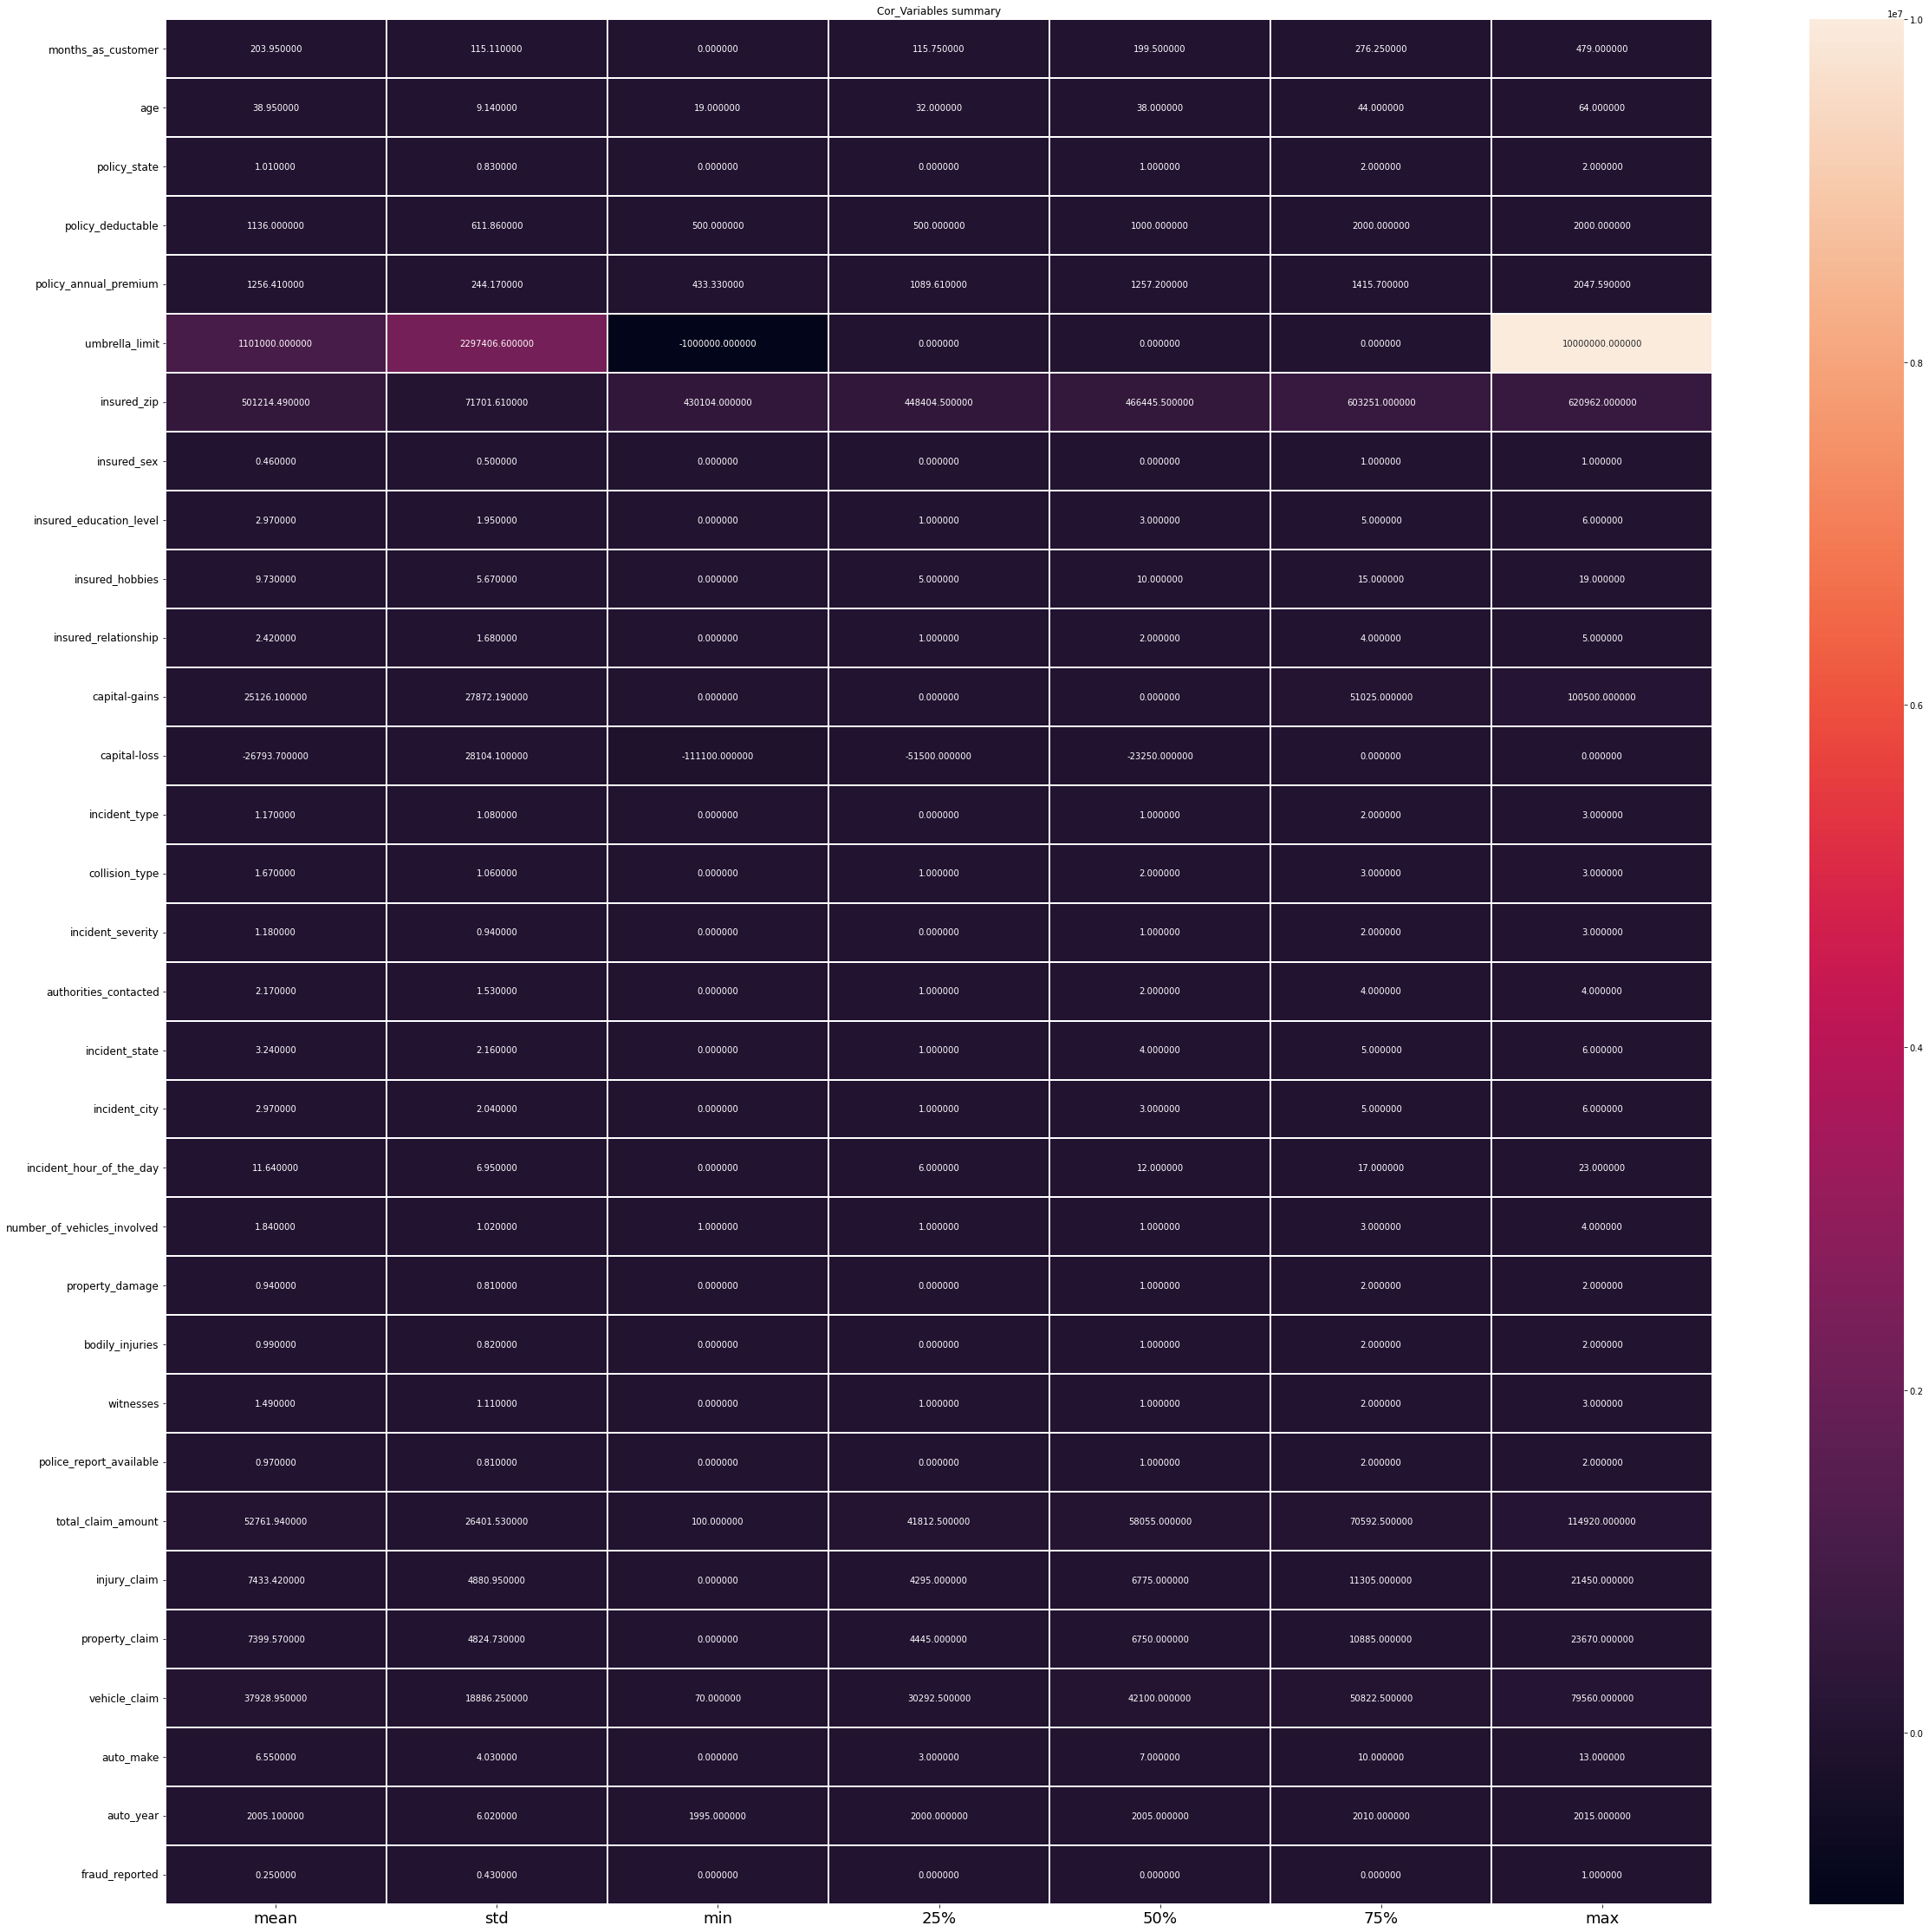

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
sns.heatmap(round(dataset.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Cor_Variables summary')
plt.savefig('heatmap.png')
plt.show()

In [52]:
# Check skewness

In [53]:
dataset.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967


In [54]:
# Normal Distribution Curve

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

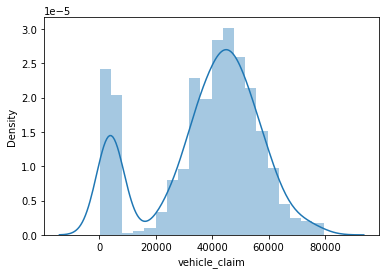

In [56]:
sns.distplot(dataset['vehicle_claim'])

<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

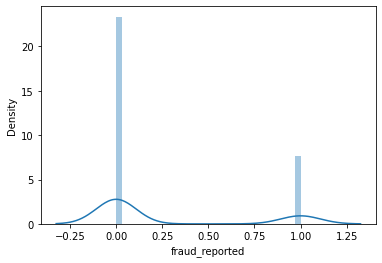

In [57]:
sns.distplot(dataset['fraud_reported'])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

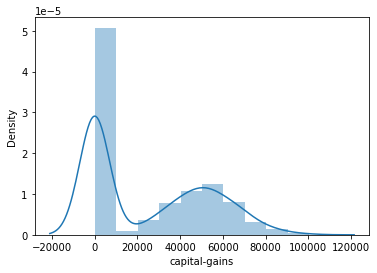

In [60]:
sns.distplot(dataset['capital-gains'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

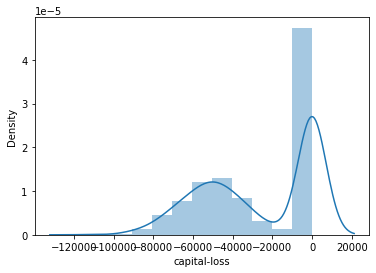

In [59]:
sns.distplot(dataset['capital-loss'])

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

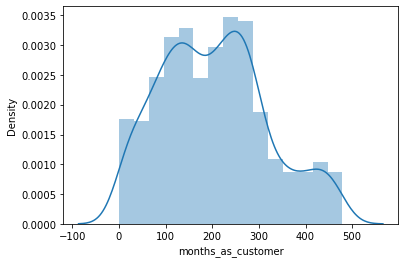

In [61]:
sns.distplot(dataset['months_as_customer'])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

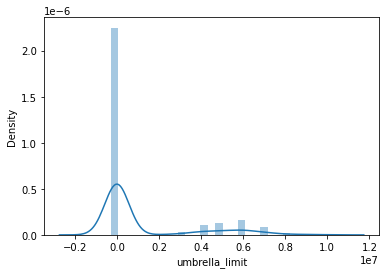

In [62]:
sns.distplot(dataset['umbrella_limit'])

In [63]:
# The Normal distribution curve shows that the Data is skewed. We will handel the skewness as we move further

In [64]:
# Lets us remove the outliers

In [65]:
from scipy.stats import zscore

In [69]:
zscore(dataset)

months_as_customer       age  policy_state  policy_csl  \
0              1.078140  0.990836      1.187173    0.060937   
1              0.208995  0.334073     -0.016856    0.060937   
2             -0.608002 -1.088913      1.187173   -1.182668   
3              0.452355  0.224613     -1.220886    0.060937   
4              0.208995  0.552994     -1.220886    1.304542   
..                  ...       ...           ...         ...   
995           -1.746582 -0.103769      1.187173    1.304542   
996            0.704407  0.224613     -1.220886   -1.182668   
997           -0.642767 -0.541611      1.187173    0.060937   
998            2.208028  2.523284     -1.220886    1.304542   
999            2.190645  2.304363      1.187173    0.060937   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0            -0.222383               0.616705       -0.479476    -0.489529   
1             1.412784              -0.242521        1.697980    -0.461008   
2             1.412784               0.642233        1.697980    -0.984885   
3             1.412784               0.652886        2.133471     1.491682   
4            -0.222383               1.341980        2.133471     1.527808   
..                 ...                    ...             ...          ...   
995          -0.222383               0.222884       -0.479476    -0.975717   
996          -0.222383               0.739141       -0.479476     1.492519   
997          -1.039966               0.520739        0.826998    -0.815138   
998           1.412784               0.411866        1.697980    -0.830250   
999          -0.222383              -2.008710       -0.479476     1.549492   

     insured_sex  insured_education_level  insured_hobbies  \
0       1.076953                 0.530931         1.281737   
1       1.076953                 0.530931         0.929078   
2      -0.928546                 1.557877        -1.363201   
3      -0.928546                 1.557877        -1.363201   
4       1.076953                -1.522961        -1.363201   
..           ...                      ...              ...   
995    -0.928546                 1.044404         0.576420   
996    -0.928546                 1.557877         1.281737   
997    -0.928546                 1.044404        -1.186872   
998     1.076953                -1.522961        -1.715859   
999    -0.928546                -1.522961         0.223762   

     insured_relationship  capital-gains  capital-loss  incident_type  \
0               -1.437957       1.011331      0.953851       0.766005   
1               -0.247595      -0.901927      0.953851       1.691132   
2                0.347586       0.358023      0.953851      -1.084249   
3                0.942766       0.853388     -1.267577       0.766005   
4                0.942766       1.467210     -0.683741       1.691132   
..                    ...            ...           ...            ...   
995              0.942766      -0.901927      0.953851       0.766005   
996              1.537947       1.643100      0.953851       0.766005   
997             -0.247595       0.358023      0.953851      -1.084249   
998              1.537947      -0.901927      0.953851       0.766005   
999             -1.437957      -0.901927      0.953851      -0.159122   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0          1.254675          -1.260614               1.196963        0.351762   
1         -1.566933          -0.195906               1.196963        0.815829   
2          0.314139          -0.195906               1.196963       -1.040437   
3         -0.626397          -1.260614               1.196963       -0.576371   
4         -1.566933          -0.195906              -0.109052       -1.040437   
..              ...                ...                    ...             ...   
995       -0.626397          -0.195906              -0.762060       -1.504504   
996        0.314139          -1.260614   

In [70]:
import numpy as np
z=np.abs(zscore(dataset))
z.shape

(1000, 33)

In [71]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 28,  6,  6,  6,  5, 13,
        6,  6,  6], dtype=int64))


In [72]:
#Total rpws of dataloss

len(np.where(z>3)[0])

20

In [74]:
ds_new=dataset[(z<3).all(axis=1)]
ds_new.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   
3                 256   41             0           1               2000   
4                 228   44             0           2               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   
2                1413.14         5000000       430632            0   
3                1415.74         6000000       608117            0   
4                1583.91         6000000       610706            1   

   insured_education_level  insured_hobbies  insured_relationship  \
0                        4               17                     0   
1                        4               15                     2   
2                        6                2                     3   
3                        6                2                     4   
4                        0                2                     4   

   capital-gains  capital-loss  incident_type  collision_type  \
0          53300             0              2               3   
1              0             0              3               0   
2          35100             0              0               2   
3          48900        -62400              2               1   
4          66000        -46000              3               0   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   
2                  1                      4               1              1   
3                  0                      4               2              0   
4                  1                      2               1              0   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                         5                            1                2   
1                         8                            1                0   
2                         7                            3                1   
3                         5                            1                0   
4                        20                            1                1   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                1          2                        2               71610   
1                0          0                        0                5070   
2                2          3                        1               34650   
3                1          2                        1               63400   
4                0          1                        1                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_year  \
0          6510           13020          52080         10       2004   
1           780             780           3510          8       2007   
2          7700            3850          23100          4       2007   
3          6340            6340          50720          3       2014   
4          1300             650           4550          0       2009   

   fraud_reported  
0               1  
1               1  
2               0  
3               1  
4               0

In [75]:
print('Old Dataframe', dataset.shape)
print('New datagrame', ds_new.shape)
print('Total_Dropped_rows', dataset.shape[0] - ds_new.shape[0])

Old Dataframe (1000, 33)
New datagrame (980, 33)
Total_Dropped_rows 20


In [78]:
#percentage data loss

loss_percent= (1000-980)/1000*100
print(loss_percent)

2.0


# Observation: Total 20 rows were deleted as outliers

Data without outliers is dataset and Data with No outliers is ds_new



In [79]:
# seperate the data x and y variable

In [80]:
# independent columns

x=ds_new.iloc[:,:-1]
x

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  insured_hobbies  insured_relationship  \
0                          4               17                     0   
1                          4               15                     2   
2                          6                2                     3   
3                          6                2                     4   
4                          0                2                     4   
..                       ...              ...                   ...   
995                        5               13                     4   
996                        6               17                     5   
997                        5                3                     2   
998                        0                0                     5   
999                        0               11                     0   

     capital-gains  capital-loss  incident_type  collision_type  \
0            53300             0              2               3   
1                0             0              3               0   
2            35100             0              0               2   
3            48900        -62400              2               1   
4            66000        -46000              3               0   
..             ...           ...            ...             ...   
995              0             0              2               1   
996          70900             0              2               2   
997          35100             0              0               3   
998              0             0              2               2   
999              0             0              1               0   

     incident_severity  authorities_contacted  incident_state  incident_city  \
0                    0                      4               4              1   
1                    1                      4               5              5   
2                    1                      4               1              1   
3                    0                      4               2              0   
4                    1                      2               1              0   
..                 ...                    ...             ...            ... 

In [81]:
# Target Column/variable

y=ds_new.iloc[:,-1]
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int64

Transforming data to Remove skewness

In [82]:
from sklearn.preprocessing import power_transform

In [83]:
# YEO-JOHNSON WORKS WITH BOTH NEGATIVE AND POSITIVE DATA. DEFAULT IS YEO-JOHNSON

x=power_transform(x,method='yeo-johnson')

In [86]:
type(x)

numpy.ndarray

In [87]:
x

array([[ 1.04454111,  1.0023305 ,  1.14147704, ...,  0.7581298 ,
         0.85481164, -0.20443508],
       [ 0.29904549,  0.42717141,  0.05900219, ..., -1.78748531,
         0.41187331,  0.29587688],
       [-0.51581942, -1.13601305,  1.14147704, ..., -0.82024583,
        -0.56458381,  0.29587688],
       ...,
       [-0.55427228, -0.47059792,  1.14147704, ...,  0.78172811,
         1.06823592, -1.49935977],
       [ 1.90408801,  2.12107486, -1.26576425, ..., -0.10201672,
        -1.44793034, -1.18090064],
       [ 1.89156317,  1.97656406,  1.14147704, ..., -1.77993883,
         0.41187331,  0.29587688]])

In [88]:
# to check dimension, you can onlu give 2d data in ML algorithm

x.ndim

2

In [89]:
# we have already used power_transform method to standardised the dataset,so we will not use standardscaler

In [92]:
x.mean()

-2.1892918317225664e-17

In [93]:
x.std()

0.9842509842514764

In [94]:
# Since the Data has yes/No classes , we will use Classification model.

In [95]:
ds_new.fraud_reported.unique()

array([1, 0], dtype=int64)

0    753
1    247
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

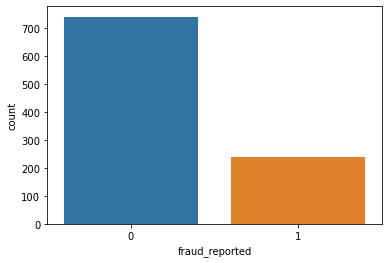

In [97]:

print(dataset['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported', data=ds_new)

Above Data is imbalanced : Balance the Data with SMOTE

In [98]:
import sklearn
from imblearn.over_sampling import SMOTE

In [105]:
from collections import Counter

In [100]:
x=ds_new.iloc[:,:-1]
x.head(3)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   
2                1413.14         5000000       430632            0   

   insured_education_level  insured_hobbies  insured_relationship  \
0                        4               17                     0   
1                        4               15                     2   
2                        6                2                     3   

   capital-gains  capital-loss  incident_type  collision_type  \
0          53300             0              2               3   
1              0             0              3               0   
2          35100             0              0               2   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   
2                  1                      4               1              1   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                         5                            1                2   
1                         8                            1                0   
2                         7                            3                1   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                1          2                        2               71610   
1                0          0                        0                5070   
2                2          3                        1               34650   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_year  
0          6510           13020          52080         10       2004  
1           780             780           3510          8       2007  
2          7700            3850          23100          4       2007

In [101]:
y=ds_new.iloc[:,-1]
y.head(3)

0    1
1    1
2    0
Name: fraud_reported, dtype: int64

In [102]:
smt=SMOTE()
trainx,trainy = smt.fit_resample(x,y)

In [106]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(trainy))

Original dataset shape Counter({0: 740, 1: 240})
Resample dataset shape Counter({1: 740, 0: 740})


In [107]:
# Observatio : Now the dataset is Balnaced

# Model Building

In [108]:
x.shape

(980, 32)

In [109]:
y.shape

(980,)

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=0)

In [124]:
x_train.shape

(784, 32)

In [125]:
x_test.shape

(196, 32)

In [126]:
y_train.shape

(784,)

In [127]:
y_test.shape

(196,)

In [128]:
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [129]:
from sklearn import metrics

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import average_precision_score

In [130]:
dtc= DecisionTreeClassifier()
svc= SVC()
logreg= LogisticRegression()
rfc= RandomForestClassifier()

model=[dtc,svc,logreg,rfc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ', m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of  DecisionTreeClassifier() is:
0.7806122448979592
[[118  24]
 [ 19  35]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       142
           1       0.59      0.65      0.62        54

    accuracy                           0.78       196
   macro avg       0.73      0.74      0.73       196
weighted avg       0.79      0.78      0.78       196



Accuracy score of  SVC() is:
0.7244897959183674
[[142   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       142
           1       0.00      0.00      0.00        54

    accuracy                           0.72       196
   macro avg       0.36      0.50      0.42       196
weighted avg       0.52      0.72      0.61       196



Accuracy score of  LogisticRegression() is:
0.7244897959183674
[[142   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0

In [131]:
predm

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [132]:
# checking the cross validation score for all models

In [133]:
score=cross_val_score(svc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.75510204 0.75510204 0.75510204 0.75510204 0.75510204 0.75510204
 0.75510204 0.75510204 0.75510204 0.75510204]
0.7551020408163265
0.0


In [134]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80102041 0.76530612 0.73469388 0.76530612 0.81122449]
0.7755102040816326
0.02756991037980874


In [135]:
score=cross_val_score(logreg,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.75510204 0.75510204 0.75510204 0.75510204 0.74489796 0.75510204
 0.75510204 0.75510204 0.75510204 0.75510204]
0.7540816326530612
0.0030612244897958883


In [136]:
score=cross_val_score(rfc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.74489796 0.78571429 0.70408163 0.80612245 0.75510204 0.7244898
 0.73469388 0.81632653 0.80612245 0.78571429]
0.7663265306122449
0.03691847452066437


In [137]:
# Lets us improve the model using Adaboost Classifier

In [138]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7602040816326531
[[127  15]
 [ 32  22]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       142
           1       0.59      0.41      0.48        54

    accuracy                           0.76       196
   macro avg       0.70      0.65      0.66       196
weighted avg       0.74      0.76      0.74       196



In [139]:
# As we can see Logistic Regression and Decison tree giving us Highest Accuracy score so we will go with the Logistic Regression Model



classifier = LogisticRegression(random_state = 0,
penalty = 'none')
classifier.fit(x_train, y_train)

# Predict the Test set results
predm = classifier.predict(x_test)


#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, predm )
prec = precision_score(y_test, predm )
f1 = f1_score(y_test, predm )

results = pd.DataFrame([['Logistic Regression',
acc, prec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'F1 Score',])
print (results)

                 Model  Accuracy  Precision  F1 Score
0  Logistic Regression   0.72449        0.0       0.0


In [140]:
# Gradient Boosting

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.8010204081632653
[[123  19]
 [ 20  34]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       142
           1       0.64      0.63      0.64        54

    accuracy                           0.80       196
   macro avg       0.75      0.75      0.75       196
weighted avg       0.80      0.80      0.80       196



Hyperparameter Tuning using gridseach cv

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()
grid_param={'criterion': ['gini', 'entropy']}

gd_sr=GridSearchCV(estimator=dtc, param_grid=grid_param, scoring='accuracy', cv=5)

gd_sr.fit(x_train,y_train)

best_parameters=gd_sr.best_params_
print(best_parameters)

best_result=gd_sr.best_score_
print(best_result)

print(round(best_result,2))

{'criterion': 'gini'}
0.8010452392617997
0.8


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

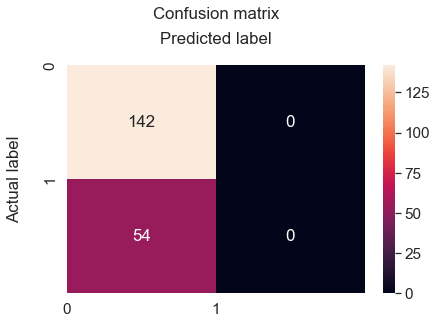

In [145]:
# Confusion Matrix


cm = confusion_matrix(y_test, predm) 
ds_new_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(ds_new_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

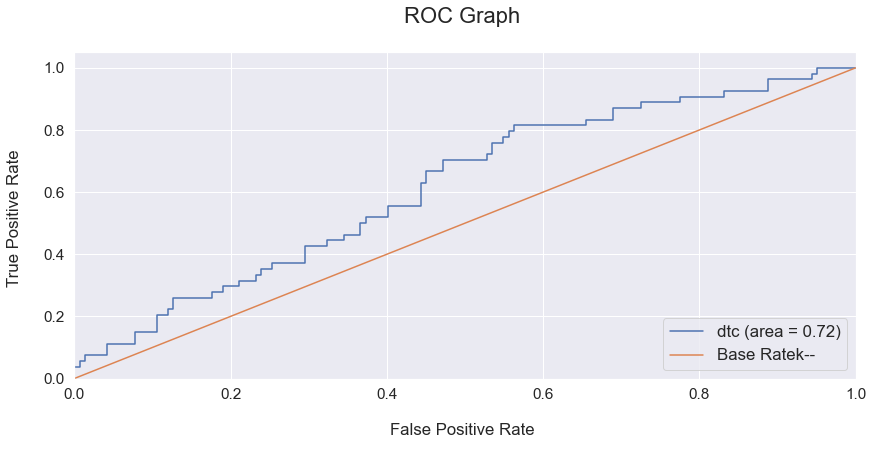

In [146]:
# Roc Graph fro dtc

dtc.fit(x_train, y_train) 
probs = classifier.predict_proba(x_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, predm )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure(figsize=(14, 6))


# Plot dtc ROC
plt.plot(rf_fpr, rf_tpr, 
label='dtc (area = %0.2f)' % classifier_roc_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [147]:
# Final HyperParameter Tuning

In [150]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train, y_train)

# Predict the Test set results
predm = classifier.predict(x_test)

#probability score
predm_probs = classifier.predict_proba(x_test)
predm_probs  = predm_probs [:, 1]

[[120  22]
 [ 21  33]]
Test Data Accuracy: 0.7806


<Figure size 2016x1440 with 0 Axes>

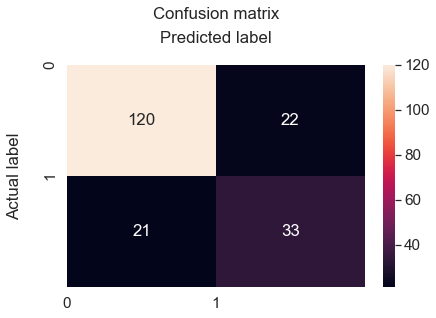

In [152]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, predm) 
print (cm)


#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(predm),
rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, predm) 
ds_new_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(ds_new_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, predm))

# Saving the best Model

In [155]:
import pickle
filename='picklelrfile.pkl'
pickle.dump(dtc,open(filename, 'wb'))


In [156]:
loaded_model=pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [ ]:
# Conclusion: The dtc model accuracy score is 78% .
# This model is performing okay.